Урок 7.


Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.


Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).


В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента? 

*4. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [1]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

### 1

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

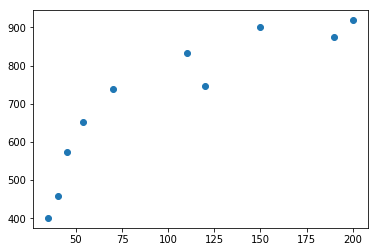

In [3]:
plt.scatter(zp, ks)
plt.show()

In [4]:
def calculate_coefs(x, y, intercept=True):
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    
    if intercept:
        x = np.hstack((np.ones(len(x)).reshape(-1,1), x))
        
    return np.dot(np.linalg.inv(np.dot(x.T, x)), x.T @ y).flatten()
    

In [5]:
def calculate_mse(target, predicted):
    return sum((target - predicted)**2) / len(target)

def calculate_rmse(target, predicted):
    return np.sqrt(calculate_mse(target, predicted))

In [6]:
weights = calculate_coefs(zp, ks, intercept=False)
weights

array([5.88982042])

In [7]:
weights_intercept = calculate_coefs(zp, ks, intercept=True)
weights_intercept

array([444.17735732,   2.62053888])

In [8]:
print(zp.flatten())
print(ks.flatten())

[ 35  45 190 200  40  70  54 150 120 110]
[401 574 874 919 459 739 653 902 746 832]


In [9]:
weights_intercept[1] * zp.flatten() + weights_intercept[0]

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

In [10]:
weights[0] * zp.flatten()

array([ 206.1437147 ,  265.04191891, 1119.06587983, 1177.96408403,
        235.59281681,  412.28742941,  318.05030269,  883.47306302,
        706.77845042,  647.88024621])

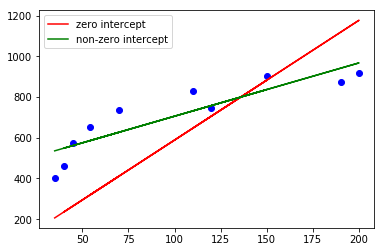

In [11]:
plt.scatter(zp, ks, color='b')
plt.plot(zp.flatten(), weights[0] * zp.flatten(), color='r', label='zero intercept')
plt.plot(zp.flatten(), weights_intercept[1] * zp.flatten() + weights_intercept[0], color='g', label='non-zero intercept')
plt.legend()
plt.show()

In [12]:
# calculate_mse(ks.flatten(), weights_intercept[1] * zp.flatten() + weights_intercept[0])

In [13]:
# calculate_mse(ks.flatten(), weights[0] * zp.flatten())

In [14]:
print(f'MSE модели со свободным членом: {calculate_mse(ks.flatten(), weights_intercept[1] * zp.flatten() + weights_intercept[0])}')
print(f'MSE модели без свободного члена: {calculate_mse(ks.flatten(), weights[0] * zp.flatten())}')
print()
print(f'RMSE модели со свободным членом: {calculate_rmse(ks.flatten(), weights_intercept[1] * zp.flatten() + weights_intercept[0])}')
print(f'RMSE модели без свободного члена: {calculate_rmse(ks.flatten(), weights[0] * zp.flatten())}')

MSE модели со свободным членом: 6470.414201176658
MSE модели без свободного члена: 56516.8584157194

RMSE модели со свободным членом: 80.43888488272732
RMSE модели без свободного члена: 237.7327457792035


### 2, 4 Градиентный спуск

In [15]:
x = zp
y = ks

In [22]:
def gd_step_int(weights, eta):
    derivative_1 = 2/len(x) * ((x_int @ weights.reshape(2, -1)).flatten() - y) @ x_int.T[1].flatten()
    derivative_0 = 2/len(x) * ((x_int @ weights.reshape(2, -1)).flatten() - y) @ x_int.T[0].flatten()
    
    # print(derivative_0, derivative_1)
    
    weights[1] -= derivative_1 * eta
    weights[0] -= derivative_0 * eta
    
def gd_step(coef, eta):
    derivative_1 = 2/len(x) * sum((x * coef - y) * x)
    # print(derivative_1, coef)
    coef -= derivative_1 * eta
    return coef

In [23]:
def gradient_descent_int(x_int, eta=1e-5):
    weights = np.array([1e-1]*2)
    i = 0
    
    # x_int = np.hstack((np.ones(len(x)).reshape(-1,1), x.reshape(-1,1)))
    
    while True:
        i += 1
        gd_step_int(weights, eta)
        
        if i % 1e5 == 0:
            print(f'iteration:{i} a={weights[0]}, b={weights[1]}')
            print(calculate_rmse(y, (x * weights[1] + weights[0])))
              
        if i > 1e6:
            print(f'iteration:{i} a={weights[0]}, b={weights[1]}')
            print(calculate_rmse(y, (x * weights[1] + weights[0])))
            break
              
    return weights

def gradient_descent(eta=1e-5):
    coef = 1e-1
    i = 0
    
    while True:
        i += 1
        coef = gd_step(coef, eta)
        
        if i % 5 == 0:
            print(f'iteration:{i} a={coef}')
            print(calculate_rmse(y, (x * coef)))
              
        if i > 50:
            print(f'iteration:{i} a={coef}')
            print(calculate_rmse(y, (x * coef)))
            break
              
    return coef

In [18]:
coef = gradient_descent()

iteration:5 a=4.734343885896736
273.6975622086705
iteration:10 a=5.659221554487849
239.2685534070111
iteration:15 a=5.84379972195222
237.7941040923269
iteration:20 a=5.880636052919541
237.73518988101827
iteration:25 a=5.887987492679586
237.73284312417226
iteration:30 a=5.889454622144611
237.73274965629162
iteration:35 a=5.889747417697237
237.7327459336215
iteration:40 a=5.889805851010507
237.73274578535373
iteration:45 a=5.889817512567759
237.7327457794485
iteration:50 a=5.889819839868915
237.73274577921327
iteration:51 a=5.889819999750153
237.73274577920864


In [24]:
x_int = np.hstack((np.ones(len(x)).reshape(-1,1), x.reshape(-1,1)))
weights = gradient_descent_int(x_int)

iteration:100000 a=176.81651935942114, b=4.588432856841366
156.85293453312656
iteration:200000 a=283.1948715093171, b=3.8054411524469445
114.21134733002455
iteration:300000 a=347.24707786963995, b=3.3339885945277965
94.09419513537172
iteration:400000 a=385.8139954492996, b=3.050119029727752
85.64151108894711
iteration:500000 a=409.03578929710056, b=2.8791963600631103
82.36305336137494
iteration:600000 a=423.01802441858695, b=2.776280927667715
81.14175489497502
iteration:700000 a=431.43696484471747, b=2.7143138039040156
80.69441418561426
iteration:800000 a=436.50615137197536, b=2.677002349847291
80.53161939147799
iteration:900000 a=439.5583943796974, b=2.654536491836305
80.47251764450289
iteration:1000000 a=441.3962015560758, b=2.6410094184769326
80.45107989006299
iteration:1000001 a=441.396215664944, b=2.6410093146294247
80.45107976634156


In [25]:
print(f'градиентный спуск со свободным членом: y = {weights[1]} * x + {weights[0]}')
print(f'градиентный спуск со свободным членом: y = {coef} * x')

градиентный спуск со свободным членом: y = 2.6410093146294247 * x + 441.396215664944
градиентный спуск со свободным членом: y = 5.889819999750153 * x


не стала вводить условие выхода из цикла обучения, просто постаралась подобрать разумное кол-во итераций

### 3

таблица Z значений используется при известном среднем отклонении генеральной совокупности, 

таблица критических точек распределения Стьюдента t - если характеристики генеральной совокупности неизвестны